This notebook shows how to work with biological ontologies such as the sequence ontology or the gene ontology.

In [2]:
import requests
import sys
sys.path.insert(0, '../../')
import picea
picea.__version__

'0.0.23_alpha'

In [4]:
obo_url = (
    'https://raw.githubusercontent.com/The-Sequence-Ontology/'
    'SO-Ontologies/master/Ontology_Files/so.obo'
)
r = requests.get(obo_url)
r

<Response [200]>

In [7]:
r.text.split('\n')[:100]

['format-version: 1.2',
 'data-version: 2021-11-22',
 'date: 22:11:2021 06:31',
 'saved-by: Evan Christensen',
 'auto-generated-by: OBO-Edit 2.3.1',
 'subsetdef: Alliance_of_Genome_Resources "Alliance of Genome Resources Gene Biotype Slim"',
 'subsetdef: biosapiens "biosapiens protein feature ontology"',
 'subsetdef: DBVAR "database of genomic structural variation"',
 'subsetdef: SOFA "SO feature annotation"',
 'synonymtypedef: aa1 "amino acid 1 letter code"',
 'synonymtypedef: aa3 "amino acid 3 letter code"',
 'synonymtypedef: AAMOD "amino acid modification"',
 'synonymtypedef: AGR "Alliance of Genome Resources"',
 'synonymtypedef: BS "biosapiens"',
 'synonymtypedef: dbsnp "dbsnp variant terms"',
 'synonymtypedef: dbvar "DBVAR"',
 'synonymtypedef: ebi_variants "ensembl variant terms"',
 'synonymtypedef: RNAMOD "RNA modification" EXACT',
 'synonymtypedef: VAR "variant annotation term"',
 'default-namespace: sequence',
 'ontology: so',
 '',
 '[Term]',
 'id: SO:0000000',
 'name: Sequence

In [8]:
so = picea.Ontology.from_obo(string=r.text)

In [9]:
ids = [el.ID for el in so['SO:0000866'].parents.elements]

In [10]:
'SO:0000866' in {el.ID for so_id in ids for el in so[so_id].children.elements}

True

In [11]:
len(so)

2508

In [12]:
url = 'http://purl.obolibrary.org/obo/go.obo'
# url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
r = requests.get(url)
go = picea.Ontology.from_obo(string=r.text)
len(go.elements)

/Users/rensholmer/Code/picea/docs/examples/../../picea/ontology.py:31: UserWarning: Accessed GO term by alt ID GO:0008150, returning main GO term with ID GO:0044699
  warnings.warn(
/Users/rensholmer/Code/picea/docs/examples/../../picea/ontology.py:31: UserWarning: Accessed GO term by alt ID GO:0003674, returning main GO term with ID GO:0005554
  warnings.warn(
/Users/rensholmer/Code/picea/docs/examples/../../picea/ontology.py:31: UserWarning: Accessed GO term by alt ID GO:0005575, returning main GO term with ID GO:0008372
  warnings.warn(


47071

In [13]:
[(term.ID, term.name, len(term.parents)) for term in go['GO:0048316'].parents]

[('GO:0009791', ['post-embryonic development'], 5),
 ('GO:0032501', ['multicellular organismal process'], 1),
 ('GO:0044699', ['biological_process'], 0),
 ('GO:0007275', ['multicellular organism development'], 4),
 ('GO:0048856', ['anatomical structure development'], 2),
 ('GO:0032502', ['developmental process'], 1),
 ('GO:0048608', ['reproductive structure development'], 10),
 ('GO:0003006', ['developmental process involved in reproduction'], 4),
 ('GO:0022414', ['reproductive process'], 2),
 ('GO:0000003', ['reproduction'], 1),
 ('GO:0061458', ['reproductive system development'], 6),
 ('GO:0048731', ['system development'], 5),
 ('GO:0010154', ['fruit development'], 11)]

In [14]:
go['GO:0048316'].children

In [15]:
import networkx as nx
nx.__version__

'2.8.4'

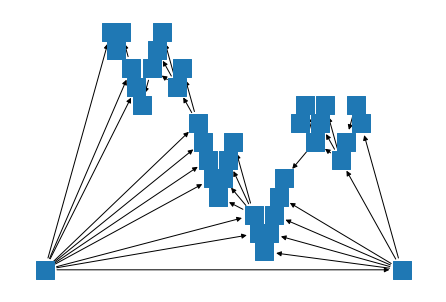

In [23]:
graph = nx.DiGraph()
for term in [go['GO:0048316'], *go['GO:0048316'].children]:
    graph.add_node(term.ID, name=term.name)
    for child_ID in term._children:
        graph.add_edge(term.ID, child_ID)
layout = nx.planar_layout(graph)
nx.draw(graph, pos=layout, node_shape='s')

In [27]:
import sys
!{sys.executable} -m pip install pygraphviz
nx.nx_agraph.to_agraph(graph)

  Using cached pygraphviz-1.9.zip (119 kB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /Users/rensholmer/miniconda3/envs/jupyter/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/pip-install-etjtutds/pygraphviz_3e962e09024f42e1ba17e94e6b9c6566/setup.py'"'"'; __file__='"'"'/private/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/pip-install-etjtutds/pygraphviz_3e962e09024f42e1ba17e94e6b9c6566/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/pip-wheel-xc94xau2
       cwd: /private/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/pip-install-etjtutds/pygr

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [10]:
[(term.ID, term.name) for term in go['GO:0048316'].children]

[('GO:0009793', ['embryo development ending in seed dormancy']),
 ('GO:0009942', ['longitudinal axis specification']),
 ('GO:0010069', ['zygote asymmetric cytokinesis in embryo sac']),
 ('GO:0010262', ['somatic embryogenesis']),
 ('GO:0010654', ['apical cell fate commitment']),
 ('GO:0048508', ['embryonic meristem development']),
 ('GO:0010065', ['primary meristem tissue development']),
 ('GO:0010066', ['ground meristem histogenesis']),
 ('GO:0010067', ['procambium histogenesis']),
 ('GO:0010068', ['protoderm histogenesis']),
 ('GO:0010071', ['root meristem specification']),
 ('GO:0010072', ['primary shoot apical meristem specification']),
 ('GO:0048825', ['cotyledon development']),
 ('GO:0048826', ['cotyledon morphogenesis']),
 ('GO:0010588', ['cotyledon vascular tissue pattern formation']),
 ('GO:0009960', ['endosperm development']),
 ('GO:0010214', ['seed coat development']),
 ('GO:0048359',
  ['mucilage metabolic process involved in seed coat development']),
 ('GO:0048354',
  ['muc

In [11]:
go['GO:0010431'].__dict__

{'_ID': 'GO:0010431',
 '_original_ID': 'GO:0010431',
 '_container': <picea.ontology.Ontology at 0x10c778e80>,
 '_children': ['GO:0010162', 'GO:1990068'],
 '_parents': ['GO:0003006', 'GO:0048609', 'GO:0071695', 'GO:0048316'],
 'name': ['seed maturation'],
 'def': ['"A process in seed development that occurs after embryogenesis by which a quiescent state is established in a seed. Seed maturation is characterized by storage compound accumulation, acquisition of desiccation tolerance, growth arrest and the entry into a dormancy period of variable length that is broken upon germination." [PMID:16096971]'],
 'alt_id': [],
 'namespace': ['biological_process'],
 'is_a': ['GO:0003006 ! developmental process involved in reproduction',
  'GO:0048609 ! multicellular organismal reproductive process',
  'GO:0071695 ! anatomical structure maturation'],
 'relationship': ['part_of GO:0048316 ! seed development']}

In [12]:
go['GO:0048316'].__dict__

{'_ID': 'GO:0048316',
 '_original_ID': 'GO:0048316',
 '_container': <picea.ontology.Ontology at 0x10c778e80>,
 '_children': ['GO:0009793',
  'GO:0009960',
  'GO:0010214',
  'GO:0010344',
  'GO:0010431',
  'GO:0048317',
  'GO:0080001',
  'GO:0080112',
  'GO:0090376',
  'GO:0140547'],
 '_parents': ['GO:0009791', 'GO:0048608', 'GO:0010154'],
 'name': ['seed development'],
 'def': ['"The process whose specific outcome is the progression of the seed over time, from its formation to the mature structure. A seed is a propagating organ formed in the sexual reproductive cycle of gymnosperms and angiosperms, consisting of a protective coat enclosing an embryo and food reserves." [GOC:jid, PO:0009010]'],
 'alt_id': [],
 'namespace': ['biological_process'],
 'is_a': ['GO:0009791 ! post-embryonic development',
  'GO:0048608 ! reproductive structure development'],
 'relationship': ['part_of GO:0010154 ! fruit development']}

In [13]:
go['GO:0048316'].children._elements.keys()

dict_keys(['GO:0009793', 'GO:0009942', 'GO:0010069', 'GO:0010262', 'GO:0010654', 'GO:0048508', 'GO:0010065', 'GO:0010066', 'GO:0010067', 'GO:0010068', 'GO:0010071', 'GO:0010072', 'GO:0048825', 'GO:0048826', 'GO:0010588', 'GO:0009960', 'GO:0010214', 'GO:0048359', 'GO:0048354', 'GO:0010344', 'GO:0010431', 'GO:0010162', 'GO:0010231', 'GO:0098755', 'GO:0048700', 'GO:0048838', 'GO:1990068', 'GO:0048317', 'GO:0080001', 'GO:0080112', 'GO:0090376', 'GO:0090377', 'GO:0090378', 'GO:0090379', 'GO:0090380', 'GO:0140547'])

In [23]:
[(term.ID,term.name) for term in go if term.__dict__.get('alt_id') and term._parents]

[('GO:0019952', ['reproduction']),
 ('GO:0000003', ['reproduction']),
 ('GO:0050876', ['reproduction']),
 ('GO:0000022', ['mitotic spindle elongation']),
 ('GO:1905121', ['mitotic spindle elongation']),
 ('GO:0000049', ['tRNA binding']),
 ('GO:0000946', ['tRNA binding']),
 ('GO:0006594', ['urea cycle']),
 ('GO:0000050', ['urea cycle']),
 ('GO:0006871', ['urea cycle']),
 ('GO:0000055', ['ribosomal large subunit export from nucleus']),
 ('GO:0000057', ['ribosomal large subunit export from nucleus']),
 ('GO:0000058', ['ribosomal small subunit export from nucleus']),
 ('GO:0000056', ['ribosomal small subunit export from nucleus']),
 ('GO:0016359', ['mitotic sister chromatid segregation']),
 ('GO:0000070', ['mitotic sister chromatid segregation']),
 ('GO:0000073', ['initial mitotic spindle pole body separation']),
 ('GO:0030475', ['initial mitotic spindle pole body separation']),
 ('GO:0031576', ['cell cycle checkpoint signaling']),
 ('GO:0071779', ['cell cycle checkpoint signaling']),
 ('G

In [19]:
[(term.ID,term.name) for term in go if not term.parents and term.children]

[('GO:0005554', ['molecular_function']),
 ('GO:0008372', ['cellular_component']),
 ('GO:0007582', ['biological_process'])]

In [24]:
go['GO:0005554'].__dict__

{'_ID': 'GO:0005554',
 '_original_ID': 'GO:0005554',
 '_container': <picea.ontology.Ontology at 0x10c778e80>,
 '_children': ['GO:0003774',
  'GO:0003824',
  'GO:0005198',
  'GO:0005215',
  'GO:0005478',
  'GO:0005488',
  'GO:0016209',
  'GO:0031386',
  'GO:0038024',
  'GO:0044183',
  'GO:0045182',
  'GO:0045735',
  'GO:0060089',
  'GO:0060090',
  'GO:0032947',
  'GO:0050827',
  'GO:0090729',
  'GO:0098772',
  'GO:0140104',
  'GO:0140110',
  'GO:0140223',
  'GO:0140299',
  'GO:0140313',
  'GO:0140489',
  'GO:0140522',
  'GO:0140657',
  'GO:0140691',
  'GO:0140776',
  'GO:0140777'],
 '_parents': [],
 'name': ['molecular_function'],
 'def': ['"A molecular process that can be carried out by the action of a single macromolecular machine, usually via direct physical interactions with other molecular entities. Function in this sense denotes an action, or activity, that a gene product (or a complex) performs. These actions are described from two distinct but related perspectives: (1) biochemic

In [20]:
go['GO:0003674'].__dict__

{'_ID': 'GO:0005554',
 '_original_ID': 'GO:0005554',
 '_container': <picea.ontology.Ontology at 0x10c778e80>,
 '_children': ['GO:0003774',
  'GO:0003824',
  'GO:0005198',
  'GO:0005215',
  'GO:0005478',
  'GO:0005488',
  'GO:0016209',
  'GO:0031386',
  'GO:0038024',
  'GO:0044183',
  'GO:0045182',
  'GO:0045735',
  'GO:0060089',
  'GO:0060090',
  'GO:0032947',
  'GO:0050827',
  'GO:0090729',
  'GO:0098772',
  'GO:0140104',
  'GO:0140110',
  'GO:0140223',
  'GO:0140299',
  'GO:0140313',
  'GO:0140489',
  'GO:0140522',
  'GO:0140657',
  'GO:0140691',
  'GO:0140776',
  'GO:0140777'],
 '_parents': [],
 'name': ['molecular_function'],
 'def': ['"A molecular process that can be carried out by the action of a single macromolecular machine, usually via direct physical interactions with other molecular entities. Function in this sense denotes an action, or activity, that a gene product (or a complex) performs. These actions are described from two distinct but related perspectives: (1) biochemic